<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/4Neural_Network_Multi_Classs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
df = df[df['n/m']!=2]
print(df.shape[0])
#df = df.drop(['inst.name', 'type', 'CPLEXStatus'], axis = 1)
#standard_deviations = 3
#df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
#   .all(axis=1)]

#print(df.shape[0])

#names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2',
   #      '(m/n)^3', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']
#for i in range(df.shape[0]):
 # if(df.iloc[i]['n/m'] == 2 and df.iloc[i]['y']==99999):
  #  for j in range(len(names)):
   #   print(names[j]+"->"+str(df.iloc[i][names[j]]))
    #print("------------------------------------------------------------------")


shuffled = df.sample(frac=1).reset_index()

#, 'CPLEXStatus'
columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
print(X.head())
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']
#print(names[1])




8050
   subtype  class  indeks    n   m    n/m   (n/m)^2      (n/m)^3       m/n  \
0       11      1       2  162  27   6.00   36.0000   216.000000  0.166667   
1        8      3       8  200  50   4.00   16.0000    64.000000  0.250000   
2        2      2       8  108  48   2.25    5.0625    11.390625  0.444444   
3       13      4       3   20   2  10.00  100.0000  1000.000000  0.100000   
4       11      6       7  162  27   6.00   36.0000   216.000000  0.166667   

    (m/n)^2   (m/n)^3   av.length     std.dev  median  range  min  max    k  
0  0.027778  0.004630   46.172840   26.837809    44.5     99    1  100   75  
1  0.062500  0.015625   75.175003   15.727400    74.0     50   50  100   50  
2  0.197531  0.087791   63.546295   22.985727    67.0     79   20   99   57  
3  0.010000  0.001000   95.650002   18.402733    93.0     81   58  139   17  
4  0.027778  0.004630  398.388885  137.701538   396.0    481  163  644  140  


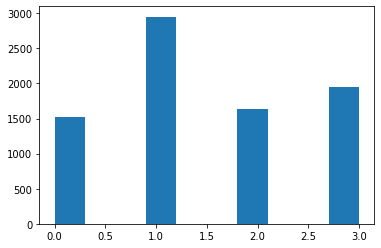

In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
plt.hist(y_new)
plt.show()
X_modified = X
#X_modified = X.drop(['n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'max', 'av.length'], axis = 1)
#print(X_modified.shape[1])

In [3]:
from imblearn.over_sampling import RandomOverSampler

names = ['n/m', 'max','av.length']
X_modified = X.drop([ 'n', 'median', 'range', 'std.dev',  'min','indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n','m'], axis = 1)
X_modified['n/m'] = X_modified['n/m']
print(X_modified.head())

oversample = RandomOverSampler(random_state=0)
#oversample.fit(X_modified, y_encoded)
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)

     n/m   av.length  max    k
0   6.00   46.172840  100   75
1   4.00   75.175003  100   50
2   2.25   63.546295   99   57
3  10.00   95.650002  139   17
4   6.00  398.388885  644  140


In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [5]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#X = pd.DataFrame(X, columns=names)
#print(X.head())

from sklearn.decomposition import PCA

#,'PC2','PC3','PC4','PC5','PC6','PC7','PC8
#pca = PCA(n_components=9)
#pca.fit(X)
#X = pca.transform(X)
#X = pd.DataFrame(X,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])


#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(4, input_dim = X_modified.shape[1], activation='relu'))
#classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(8, activation = 'relu'))

#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(16, activation = 'relu'))

classifier.add(Dense(16, activation='relu'))

classifier.add(Dense(8, activation='relu'))

#classifier.add(Dense(8, activation='relu'))


classifier.add(Dense(4, activation='relu'))

classifier.add(Dense(4, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
Total params: 396
Trainable params: 396
Non-trainable pa

In [7]:
#classifier.fit(X_train, y_train, batch_size = 64, epochs = 20, verbose = 1)
#scores = classifier.evaluate(X_test, y_test)
#for i, m in enumerate(classifier.metrics_names):
#    print("\n%s: %.3f"% (m, scores[i]))
#print(X_test_copy.iloc[0]['subtype'])

Epoch 1/600
613/613 [==============================] - 6s 7ms/step - loss: 1.2693 - accuracy: 0.3879 - val_loss: 1.1104 - val_accuracy: 0.5663
Epoch 2/600
613/613 [==============================] - 3s 5ms/step - loss: 0.9131 - accuracy: 0.6577 - val_loss: 0.7098 - val_accuracy: 0.7478
Epoch 3/600
613/613 [==============================] - 4s 6ms/step - loss: 0.6394 - accuracy: 0.7501 - val_loss: 0.5788 - val_accuracy: 0.7537
Epoch 4/600
613/613 [==============================] - 3s 5ms/step - loss: 0.5660 - accuracy: 0.7557 - val_loss: 0.5433 - val_accuracy: 0.7607
Epoch 5/600
613/613 [==============================] - 3s 5ms/step - loss: 0.5438 - accuracy: 0.7656 - val_loss: 0.5331 - val_accuracy: 0.7592
Epoch 6/600
613/613 [==============================] - 4s 6ms/step - loss: 0.5315 - accuracy: 0.7717 - val_loss: 0.5310 - val_accuracy: 0.7602
Epoch 7/600
613/613 [==============================] - 4s 6ms/step - loss: 0.5266 - accuracy: 0.7712 - val_loss: 0.5120 - val_accuracy: 0.7717

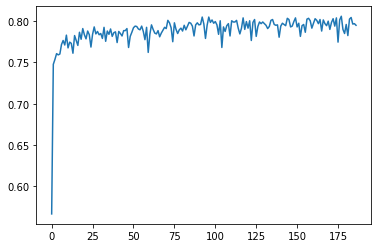

In [8]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 16, 
                    epochs = 600, validation_data =(X_test, y_test), 
                    callbacks =[earlystopping])
plt.plot(history.history['val_accuracy'])



In [9]:
from keras.metrics import accuracy
#test_size = X_test.shape[0]
pred = classifier.predict(X_test)
#print(pred)
pred_ = np.argmax(pred, axis = 1)
#print(pred_)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])


#for i,j in zip(pred_, true_y):
#    print("Predicted: {}, True: {}".format(i, j))

cnt = 0
cnt_correct = 0

print("very hard -> easy")
for i in range(len(pred_)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
  if(pred_[i] == 0 and true_y[i] == 3):
    for j in range(len(names)):
      print(names[j]+"->"+str(X_test_copy.iloc[i][names[j]]))
    print("------------------------------------------------------------------")
  
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

very hard -> easy
accuracy: 80.31%


In [10]:
print("some vhard->vhard")
cnt = 0
cnt_correct = 0
for i in range(len(pred_)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
  if(pred_[i] == 3 and true_y[i] == 3):
   # if(X_test_copy.iloc[i]['n/m'] != 2):
    #  continue
    for j in range(len(names)):
      print(names[j]+"->"+str(X_test_copy.iloc[i][names[j]]))
    print("------------------------------------------------------------------")

some vhard->vhard
n/m->4.0
max->478.0
av.length->288.391663
------------------------------------------------------------------
n/m->6.0
max->235.0
av.length->99.777779
------------------------------------------------------------------
n/m->6.0
max->563.0
av.length->370.777771
------------------------------------------------------------------
n/m->11.0
max->926.0
av.length->528.318176
------------------------------------------------------------------
n/m->9.0
max->648.0
av.length->399.80246
------------------------------------------------------------------
n/m->11.0
max->160.0
av.length->95.400002
------------------------------------------------------------------
n/m->11.0
max->985.0
av.length->630.694824
------------------------------------------------------------------
n/m->11.0
max->1155.0
av.length->705.670471
------------------------------------------------------------------
n/m->3.0
max->713.0
av.length->432.072235
------------------------------------------------------------------

accuracy: 80.31%


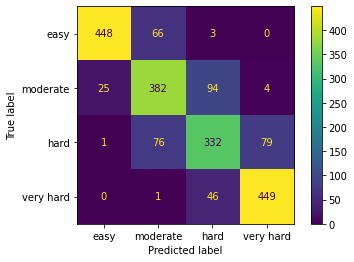

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#for i in range(len(pred_)):
#  print(true_y[i])
#print(confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3]))
cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
#plt.subplot(1, 2, 1)
cmd.plot()
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

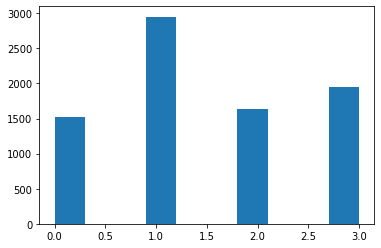

In [12]:
y_new = np.array(y_new)
plt.hist(y_new)
#plt.title('0->[0,2000) : 1->[2000,99999]')
plt.show()

ROC AUC score: 0.8683302719919408


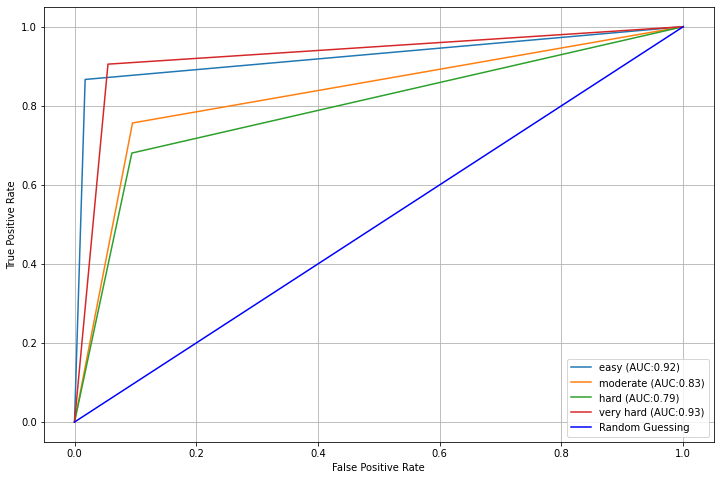

In [13]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard', 'very hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()